<a href="https://colab.research.google.com/github/CNU-Jiho-Jeong/Data-analysis-lecture/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 데이터 분석에 필요한 기본적인 라이브러리

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 시각화 라이브러리
import seaborn as sns

# barplot

- 범주형 자료의 갯수를 세어 막대로 나타내는 기법.
- 자료의 크기 정도를 높이로 요약하여 준다. 

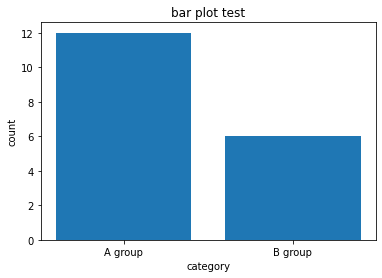

In [ ]:
x = ['A group', 'B group']
y = [12,6]

plt.bar(x,y)
plt.title("bar plot test")
plt.xlabel('category')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'count')

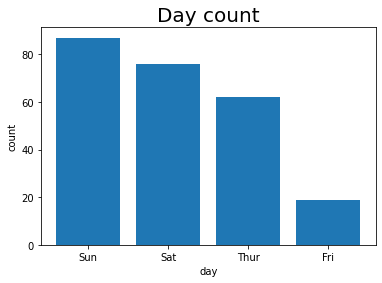

In [ ]:
# plt의 barplot은 자료를 직접 만들어줘야 한다.
tips = sns.load_dataset('tips')



# 요일별 식당을 방문한 팀의 수는?

day_value = tips['day'].value_counts()
day_label = tips['day'].unique()
plt.bar(day_label, day_value)
plt.title('Day count', fontsize=20)
plt.xlabel("day")
plt.ylabel('count')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

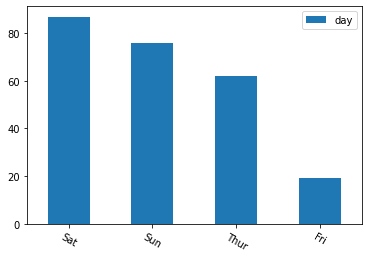

In [ ]:
# Dataframe을 이용한 막대그래프 그리기.

pd.DataFrame(day_value).plot(kind = 'bar', y = 'day')
plt.xticks(rotation=-30) # xlabel을 회전시키기

Text(0.5, 1.0, 'day count')

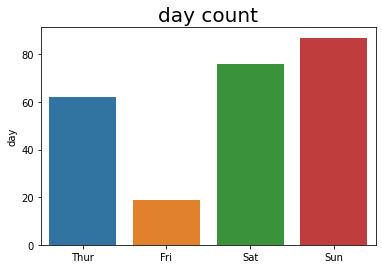

In [ ]:
# seaborn의 barplot
# x, y를 직접 입력 가능
# x를 기준으로 정렬하여 barplot을 해준다.

sns.barplot(x=day_label, y=day_value)
plt.title("day count", fontsize=20)

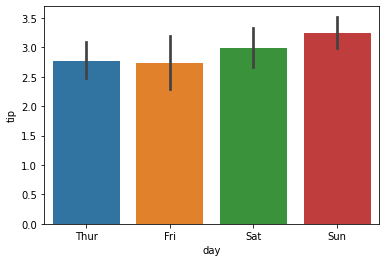

In [ ]:
# column 이름과 데이터셋으로 입력하면 안되나?
# 요일별 팀의 barplot?

sns.barplot(x='day', y = 'tip', data=tips)


Text(0.5, 1.0, 'day count')

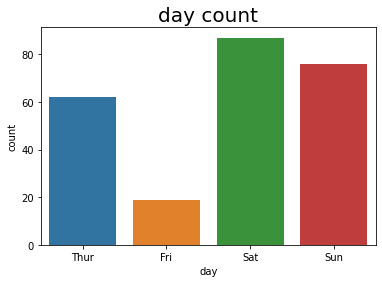

In [ ]:
# countplot

sns.countplot(x='day', data=tips)
plt.title('day count', fontsize=20)

Text(0.5, 1.0, 'day count')

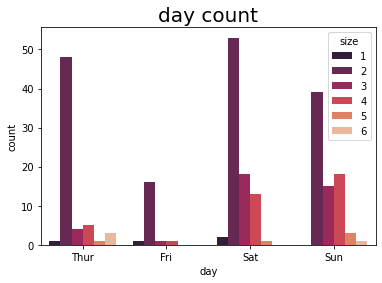

In [ ]:
# seaborn의 palette 기능
# palette: 다양한 색깔읠 활용하여 그라데이션 효과를 적용

# saturation : 채도를 조절해준다.  

sns.countplot(x='day', data=tips,  
              hue = "size", palette='rocket') # hue로 다른 색으로 구분 가능 
plt.title('day count', fontsize=20)

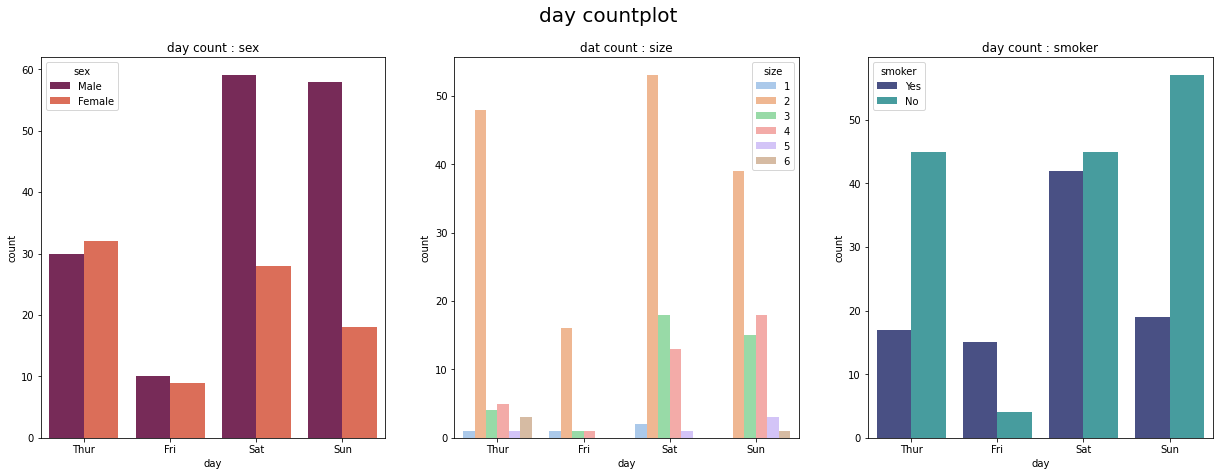

In [ ]:
# plot 여러 개를 한꺼번에 그리기
# subplot이라 한다.

# 먼저 도화지의 모양을 설정해줘야 한다.

fig, ax = plt.subplots(1,3,figsize=(21,7)) # 1*3 행렬의 도화지 
fig.suptitle('day countplot', fontsize=20)


# 각 변수에 시각화 데이터를 저장
c1 = sns.countplot(x='day', data=tips,
                   palette = 'rocket', hue = 'sex', ax = ax[0])
c2 = sns.countplot(x = 'day', data=tips,
                   palette = 'pastel', hue = 'size', ax = ax[1])
c3 = sns.countplot(x='day', data=tips,
                   palette = 'mako', hue = 'smoker', ax = ax[2])

# 각 시각화 데이터의 제목을 설정하여 지정한 위치(ax)에 출력
c1.set(title='day count : sex')
c2.set(title='day count : size')
c3.set(title='day count : smoker')

plt.show()

Text(0.5, 1.0, 'day count with time')

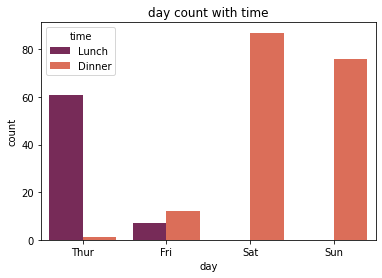

In [ ]:
sns.countplot(x = 'day', data=tips, palette = 'rocket', hue = 'time')
plt.title("day count with time")

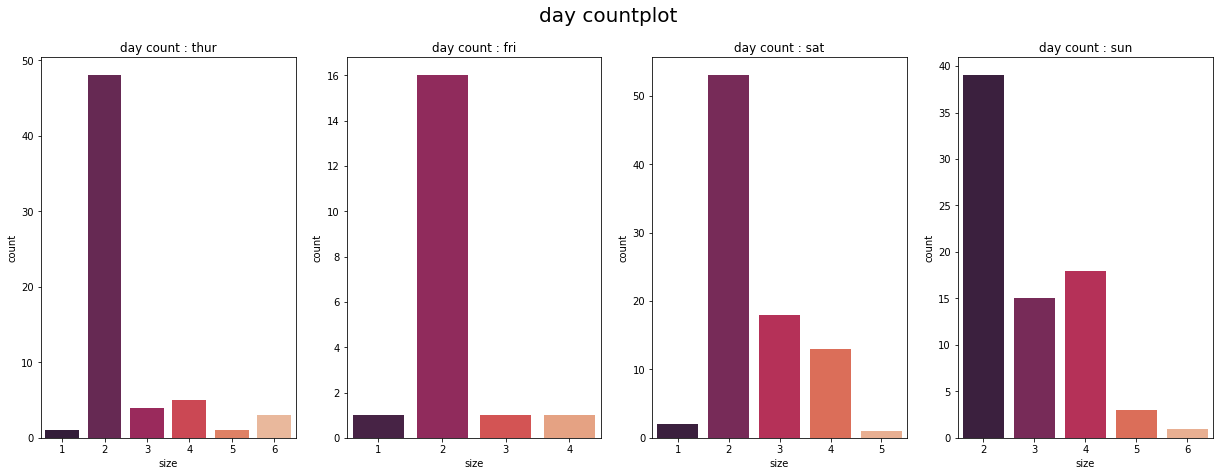

In [ ]:

fig, ax = plt.subplots(1,4,figsize=(21,7)) # 1*3 행렬의 도화지 
fig.suptitle('day countplot', fontsize=20)


# 각 변수에 시각화 데이터를 저장
c1 = sns.countplot(x='size', data=tips[tips['day']=="Thur"],
                   palette = 'rocket', ax = ax[0])
c2 = sns.countplot(x = 'size', data=tips[tips['day']=="Fri"],
                   palette = 'rocket', ax = ax[1])
c3 = sns.countplot(x='size', data=tips[tips['day']=="Sat"],
                   palette = 'rocket', ax = ax[2])
c4 = sns.countplot(x='size', data=tips[tips['day']=="Sun"],
                   palette = 'rocket', ax=ax[3])

# 각 시각화 데이터의 제목을 설정하여 지정한 위치(ax)에 출력
c1.set(title='day count : thur')
c2.set(title='day count : fri')
c3.set(title='day count : sat')
c4.set(title='day count : sun')

plt.show()



# 위 두 그림을 통하여

## => 주말에 사람이 많으므로, 알바생이 주말에 일하도록 한다.
## => 또한, 주말에는 점심에 사람이 없고 저녁에 많기 때문에, 저녁에 일하도록 시킨다.
## => 즉, 주말 저녁!

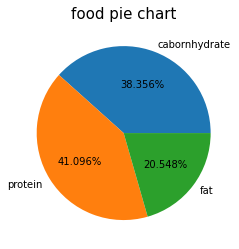

In [ ]:
# Pie chart
# autopct: 부채꼴 안에 표시할 숫자 형식
# i:integer, f:fraction, e:exponential
label = ['cabornhydrate', 'protein', 'fat']
pie_data = [280, 300, 150]
plt.pie(x=pie_data, labels=label, autopct = "%1.3f%%")
plt.title("food pie chart", fontsize = 15)
plt.show()

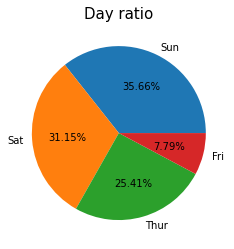

In [ ]:
# 요일별 식당 방문 팁의 비율

day_label = tips['day'].unique()
day_ratio = tips['day'].value_counts()
plt.pie(x=day_ratio, labels = day_label, autopct = '%1.2f%%')
plt.title("Day ratio", fontsize = 15)
plt.show()

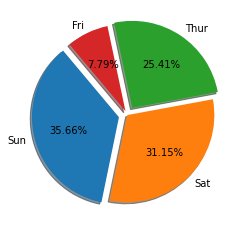

In [ ]:
# 각도 조절 및 사이간격, 그림자 설정

plt.pie(day_ratio, labels = day_label,
        autopct = '%1.2f%%', startangle = 130, explode = [0.1, 0, 0.1, 0.05], shadow = True) # startangle: 몇 도 만큼 회전시켜서 표현할 것인가?
plt.show()

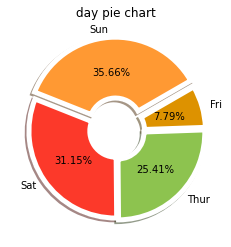

In [ ]:
# 커스터마이징

# explode: 각 파이마다 중심으로부터 떨어질 거리를 설정
# colors : 색깔변경, RGB을 각각 0~255 설정을 해줘야 한다.
# color는 16진수(00~ff)까지 입력.
# wedfeprops: 파이의 테두리 두께, 색깔등을 설정, dict 형식으로 입력

explode = [0.08, 0, 0.03, 0.03]
colors = ['#ff9933', '#fc392a', '#8dc34f', '#dd9200']
wedgeprops = {'width':0.7, 'edgecolor':'w', 'linewidth' : 5}

plt.pie(day_ratio, labels = day_label,
        autopct = '%1.2f%%', startangle = 30,
        explode = explode, colors = colors, wedgeprops = wedgeprops,
        shadow = True)
plt.title("day pie chart")
plt.show()

In [ ]:
Titanic = sns.load_dataset("titanic")

In [ ]:
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


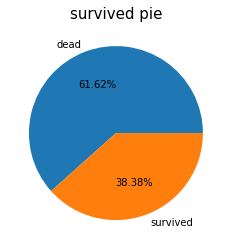

In [ ]:
label = ["dead", "survived"]
ratio = Titanic['survived'].value_counts()
plt.pie(x=ratio, labels = label, autopct = '%1.2f%%')
plt.title("survived pie", fontsize = 15)
plt.show()

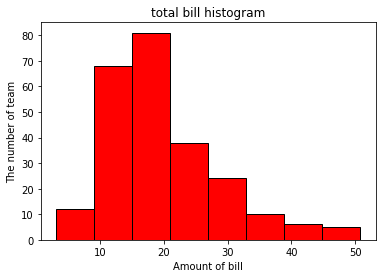

In [ ]:
# hist: 히스토그램 그리rl

plt.hist(tips["total_bill"], bins = 8, 
         color = 'r', edgecolor = 'k') # 막대 수 설정 가능, 막대 색 설정 가능, 테두리 색 설정 가능 
plt.title("total bill histogram")
plt.xlabel("Amount of bill")
plt.ylabel("The number of team")
plt.show()


## 10~20 달러 사이의 식사가 많다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


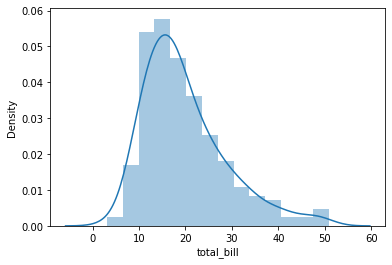

In [ ]:
# seaborn의 distplot: 히스토그램 + 분포
sns.distplot(tips['total_bill'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


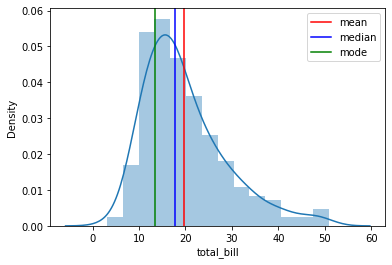

In [ ]:
# 특정 통계값을 라인으로 추가해서 보여주기

total_mean = tips['total_bill'].mean()
total_median = np.median(tips['total_bill'])
total_mode = tips['total_bill'].mode()

sns.distplot(tips['total_bill'])

plt.axvline(total_mean, color = 'r', label = 'mean')
plt.axvline(total_median, color = 'b', label = 'median')
plt.axvline(total_mode[0], color = 'g', label = 'mode')

plt.legend()
plt.show()

# Mode < Median < Mean
# 이 식당을 방문한 사람들은 주로 낮은 가격으로 식사를 하는 편.

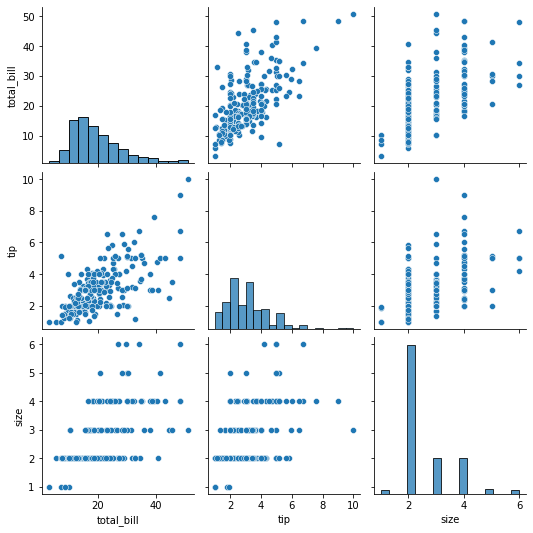

In [ ]:
# pairplot
# 쌍관계 그래프. 변수간의 상관성을 시각화

sns.pairplot(tips, palette = 'deep')
plt.show()

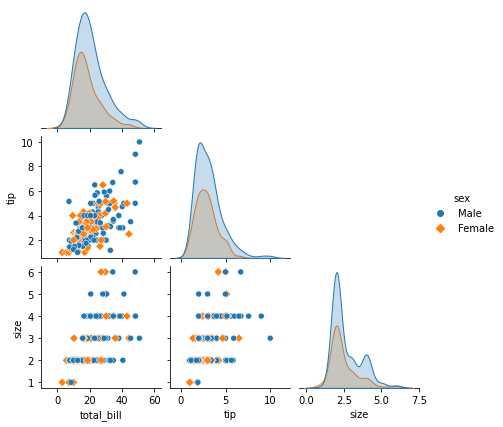

In [ ]:
# hue를 이용하여 분리 가능
# marker를 이용하여 데이터를 각각 다른 모양으로 표시 가능
# corner로 중복을 제거. 
sns.pairplot(tips, hue='sex', 
             markers = ["o", "D"], height = 2, corner = True)
plt.show()

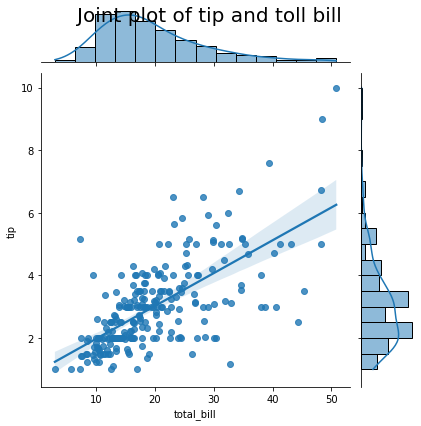

In [ ]:
# jointplot

# joint = sns.jointplot(data=tips, x = 'total_bill', y = 'tip',
#                       kind='hex')

# joint = sns.jointplot(data=tips, x = 'total_bill', y = 'tip',
#                       kind='kde')

joint = sns.jointplot(data=tips, x = 'total_bill', y = 'tip',
                      kind='reg') # 육각형(hexa)을 뜻하는 hex / 등고선 kde(밀도 추정) / regression의 reg
joint.set_axis_labels(xlabel="total_bill", ylabel = "tip")
joint.fig.suptitle("Joint plot of tip and toll bill", fontsize = 20)
plt.show()